In [1]:
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
#Downloading dataset
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 73% 11.0M/15.1M [00:00<00:00, 19.7MB/s]
100% 15.1M/15.1M [00:00<00:00, 16.3MB/s]


In [3]:
#Importing Libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras import layers
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout,AveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, GaussianNoise, GlobalMaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

In [4]:
#Unzipping the file
import zipfile
zip_ref = zipfile.ZipFile('/content/brain-mri-images-for-brain-tumor-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [6]:
#Loading the images
x_data= keras.utils.image_dataset_from_directory(
    directory = '/content/brain_tumor_dataset',
    labels='inferred',
    label_mode = 'int',
    batch_size=100,
    image_size=(256,256)
)

Found 253 files belonging to 2 classes.


In [8]:
# Spliting data into train and test
train_ds =x_data
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/brain_tumor_dataset',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    validation_split=0.2,
    subset='validation',
    seed=42
)

Found 253 files belonging to 2 classes.
Using 50 files for validation.


In [9]:
class_names = x_data.class_names
len(class_names)

2

In [10]:
class_names

['no', 'yes']

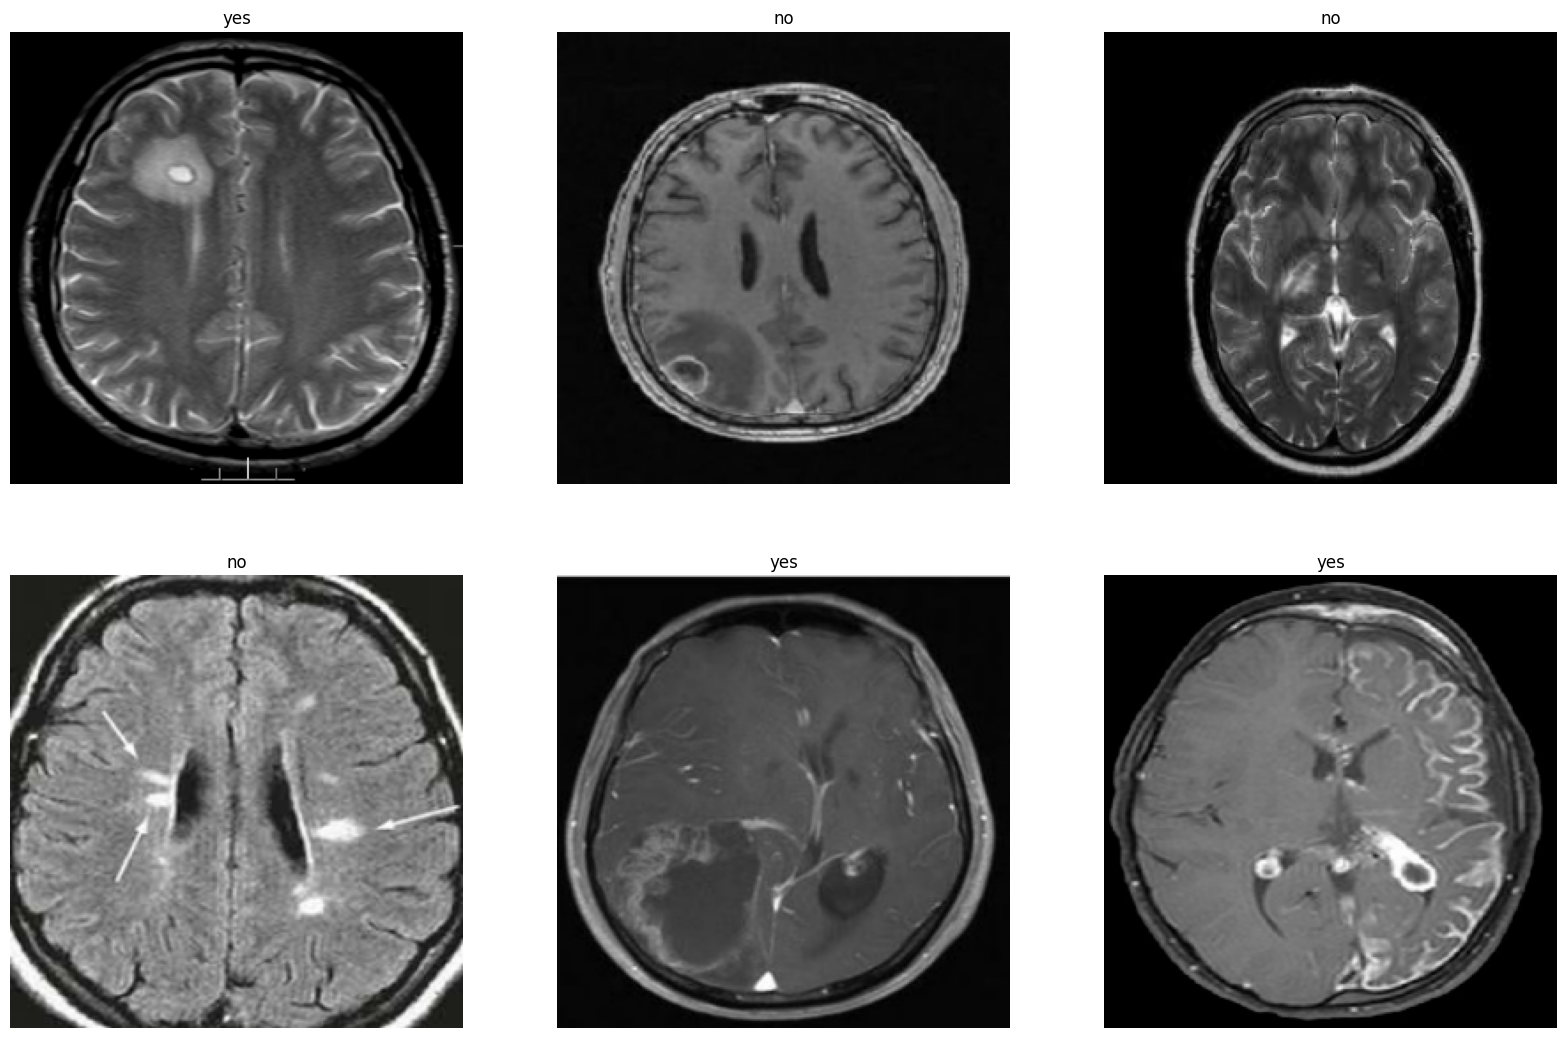

In [11]:
# Displaying a few sample images
plt.figure(figsize=(20, 20))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [12]:
input_shape = (256, 256, 3)

In [17]:
# Normalizing
def process(image,label):
    image = tf.cast(image/256. ,tf.float32)
    return image,label

x_train = train_ds.map(process)
x_test = test_ds.map(process)

# ResNet50 using Transfer Learning

In [18]:
# Createing the base model
base_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape
)
base_model.trainable = False

In [22]:
model = tf.keras.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])

In [23]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(train_ds,epochs=10, batch_size=200, validation_data=test_ds)

Epoch 1/10
3/3 [==============================] - 85s 27s/step - loss: 2.3466 - accuracy: 0.7668 - val_loss: 1.0343 - val_accuracy: 0.8800
Epoch 2/10
3/3 [==============================] - 83s 27s/step - loss: 1.2149 - accuracy: 0.8893 - val_loss: 2.4294 - val_accuracy: 0.8400
Epoch 3/10
3/3 [==============================] - 90s 31s/step - loss: 1.4861 - accuracy: 0.8972 - val_loss: 0.4745 - val_accuracy: 0.8800
Epoch 4/10
3/3 [==============================] - 103s 37s/step - loss: 0.3071 - accuracy: 0.9644 - val_loss: 0.4529 - val_accuracy: 0.9600
Epoch 5/10
3/3 [==============================] - 89s 27s/step - loss: 0.5634 - accuracy: 0.9289 - val_loss: 0.2173 - val_accuracy: 0.9800
Epoch 6/10
3/3 [==============================] - 86s 29s/step - loss: 0.1486 - accuracy: 0.9802 - val_loss: 0.0430 - val_accuracy: 0.9800
Epoch 7/10
3/3 [==============================] - 93s 32s/step - loss: 0.0307 - accuracy: 0.9921 - val_loss: 0.2318 - val_accuracy: 0.9400
Epoch 8/10
3/3 [==========

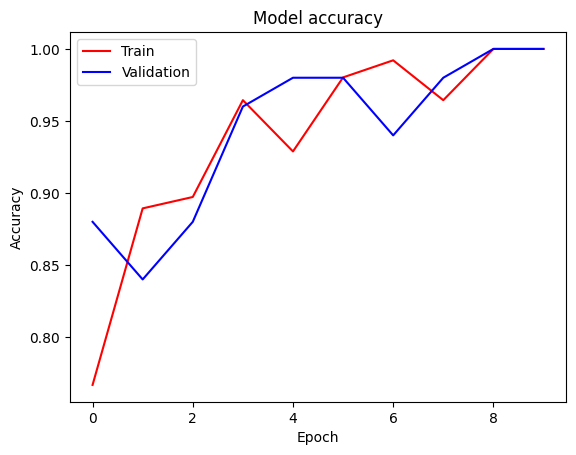

In [26]:
#Plotting  Graphs - Accuracy
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

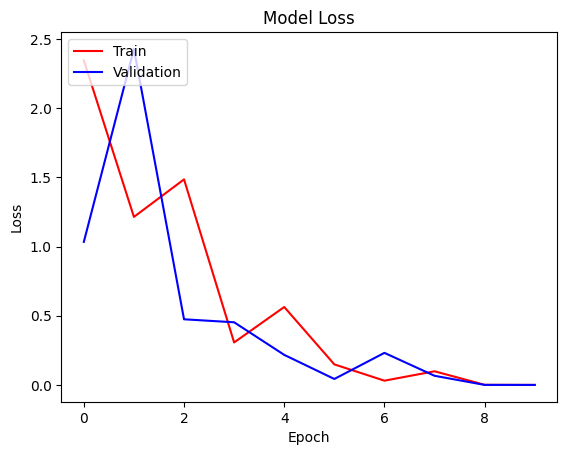

In [27]:
#Loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# CNN Model

In [28]:
#model
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(GlobalMaxPooling2D())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [31]:
history = model.fit(x_train,epochs=10, batch_size=200, validation_data=x_test)

Epoch 1/10
3/3 [==============================] - 57s 18s/step - loss: 3.6938 - accuracy: 0.4387 - val_loss: 0.6658 - val_accuracy: 0.6600
Epoch 2/10
3/3 [==============================] - 58s 18s/step - loss: 1.4388 - accuracy: 0.6166 - val_loss: 0.6602 - val_accuracy: 0.6600
Epoch 3/10
3/3 [==============================] - 58s 18s/step - loss: 0.6487 - accuracy: 0.6245 - val_loss: 0.6578 - val_accuracy: 0.6600
Epoch 4/10
3/3 [==============================] - 57s 18s/step - loss: 0.5635 - accuracy: 0.6877 - val_loss: 0.6547 - val_accuracy: 0.6600
Epoch 5/10
3/3 [==============================] - 58s 18s/step - loss: 0.5123 - accuracy: 0.7668 - val_loss: 0.6530 - val_accuracy: 0.6600
Epoch 6/10
3/3 [==============================] - 55s 18s/step - loss: 0.4877 - accuracy: 0.8142 - val_loss: 0.6442 - val_accuracy: 0.6600
Epoch 7/10
3/3 [==============================] - 61s 19s/step - loss: 0.4611 - accuracy: 0.7905 - val_loss: 0.6410 - val_accuracy: 0.6600
Epoch 8/10
3/3 [===========

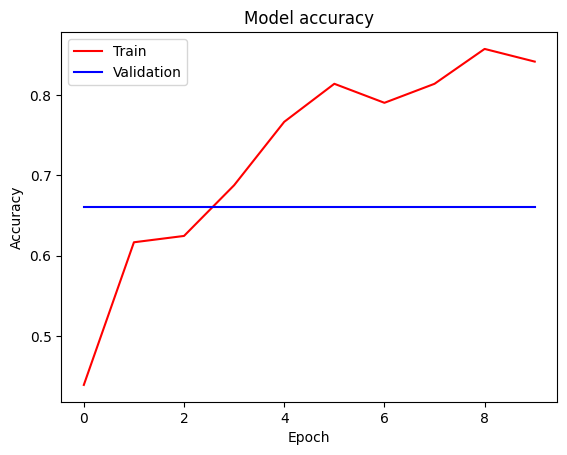

In [32]:
#Plotting  Graphs - Accuracy
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

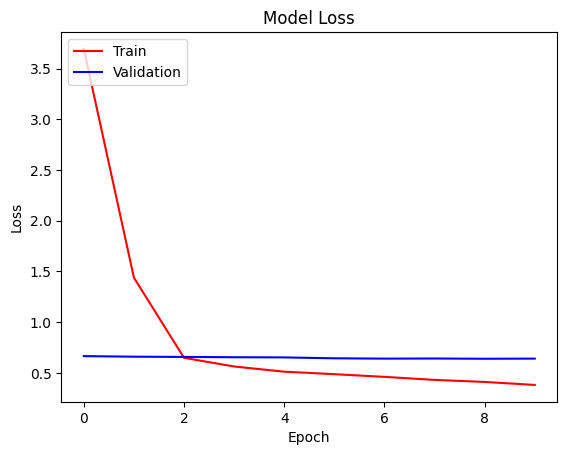

In [33]:
#Loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()